# Imports:

In [11]:
!pip install textblob

  Using cached textblob-0.17.1-py2.py3-none-any.whl (636 kB)


In [9]:
!pip install nltk==3.5

In [3]:
!pip install numpy

In [4]:
!pip install pandas

In [6]:
!pip install matplotlib

In [8]:
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=192f53b75a5657f1e565516c112e8a474cb0039e8e326cf9cb564ad22c8106fd
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\23\9d\42\5ec745cbbb17517000a53cecc49d6a865450d1f5cb16dc8a9c
Successfully built sklearn


In [14]:
!pip install seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from string import punctuation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import os
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import sklearn.feature_extraction.text as text
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
import nltk

In [2]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hisham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hisham\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Listing folders:

In [4]:
DATA_DIR= os.getcwd() + "\\20_newsgroups"
folders=os.listdir(DATA_DIR)
folders

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

# Reading Files:


In [5]:
data={}
for folder in folders:
    data[folder]=[]
    for file in os.listdir(os.path.join(DATA_DIR,folder)):
        with open(os.path.join(DATA_DIR,folder,file),encoding='latin-1') as opened_file:
            doc = opened_file.read()
            data[folder].append(doc)
len(data[folders[0]])

1000

# Text Preprocessing:

In [9]:
punctuations=list(punctuation)
stopWords=stopwords.words('english')
stopWords+=punctuations
stopWords+=['subject:','from:', 'date:', 'newsgroups:', 'message-id:', 'lines:', 'path:', 'organization:'
            , 'writes:', 'references:', 'article', 'sender:', 'nntp-posting-host:', 
            'university', 'xref:', 'cantaloupe.srv.cs.cmu.edu', 'distribution:'
            ]
st = PorterStemmer()
files = []
fldrs = []
for i in range(len(data)): 
    for doc in data[folders[i]]:
        for word in doc.split():
            word = word.lower()
            if word not in stopWords and len(word) >= 5:
                word = st.stem(word)
                word = Word(word).lemmatize()
            else:
                word = ""
        files.append(doc)
        fldrs.append(folders[i])
print(len(files))
print(len(fldrs))

19997
19997


# Data Prepration:

In [22]:
train_x, test_x, train_y, test_y = model_selection.train_test_split(files, fldrs)

#using LabelEncoder just to use numbers on the heat map instead of strings as strings overlap in the heat map
#sklearn already uses label encoding for all its classifiers as far as I know
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
test_y = encoder.fit_transform(test_y)

vectorizer = TfidfVectorizer(analyzer='word',token_pattern=r'\w{1,}', max_features=10000)
vectorizer.fit(files)
xtrain_tfidf =  vectorizer.transform(train_x)
xtest_tfidf =  vectorizer.transform(test_x)

xtrain_tfidf.data

array([0.01513623, 0.01620167, 0.01926637, ..., 0.01781425, 0.05356905,
       0.03185324])

# Model Training:

In [23]:
def train_model(classifier, feature_vector_train, label, feature_vector_test, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_test)
    print(metrics.classification_report(test_y, predictions))
    
    #confusion matrix
    cf_matrix = confusion_matrix(test_y, predictions)
    print(cf_matrix)
    
    #visualization
    plt.figure(figsize = (10,10))
    sns.set(font_scale=0.5)
    ax = sns.heatmap(cf_matrix, annot=True, cmap="Blues")
    
    ax.set_title('Seaborn Confusion Matrix with labels\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    plt.show()
    
    return metrics.accuracy_score(predictions, test_y)

              precision    recall  f1-score   support

           0       0.80      0.81      0.80       231
           1       0.79      0.83      0.81       259
           2       0.81      0.94      0.87       214
           3       0.81      0.80      0.81       246
           4       0.89      0.89      0.89       250
           5       0.92      0.89      0.91       252
           6       0.86      0.89      0.88       244
           7       0.92      0.91      0.91       244
           8       0.94      0.97      0.95       263
           9       0.97      0.97      0.97       248
          10       0.96      0.97      0.96       265
          11       0.96      0.94      0.95       230
          12       0.91      0.83      0.87       274
          13       0.96      0.90      0.93       255
          14       0.91      0.93      0.92       255
          15       0.93      1.00      0.97       250
          16       0.88      0.92      0.90       249
          17       0.93    

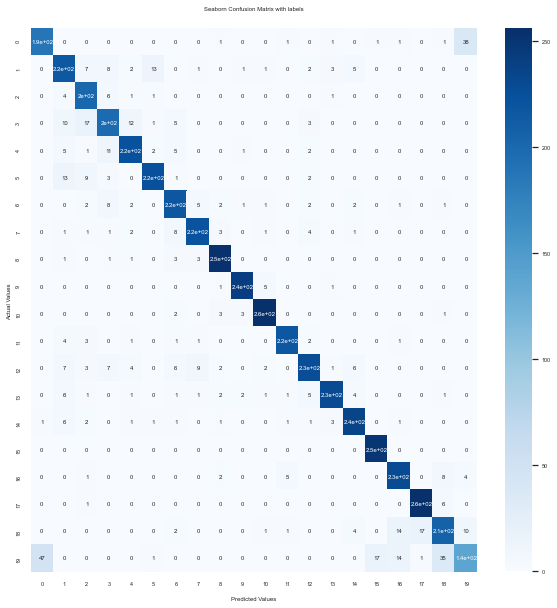

Accuracy:  0.8854


In [24]:
# Naive Bayes trainig
accuracy = train_model(naive_bayes.MultinomialNB(alpha=0.2), xtrain_tfidf, train_y, xtest_tfidf)
print ("Accuracy: ", accuracy)


              precision    recall  f1-score   support

           0       0.85      0.81      0.82       231
           1       0.93      0.94      0.94       259
           2       0.91      0.97      0.94       214
           3       0.94      0.97      0.96       246
           4       0.98      0.97      0.98       250
           5       0.96      0.94      0.95       252
           6       0.96      0.98      0.97       244
           7       0.98      0.98      0.98       244
           8       1.00      0.98      0.99       263
           9       1.00      0.99      0.99       248
          10       0.99      0.99      0.99       265
          11       0.98      0.97      0.97       230
          12       0.97      0.97      0.97       274
          13       0.98      0.98      0.98       255
          14       0.99      0.96      0.98       255
          15       0.99      0.99      0.99       250
          16       0.93      0.93      0.93       249
          17       0.94    

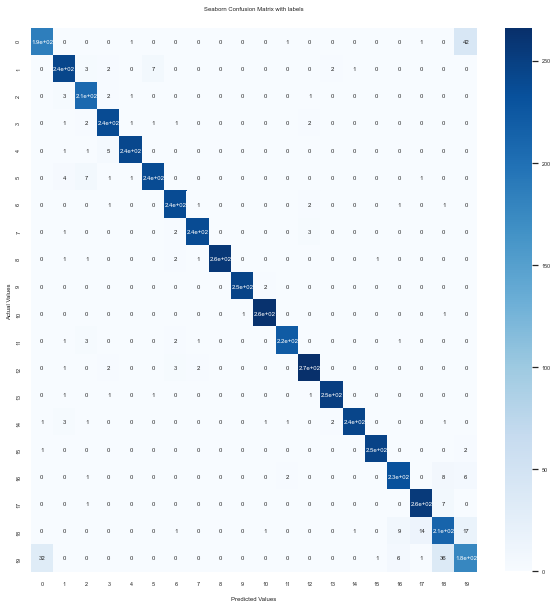

Accuracy:  0.941


In [25]:
# Linear Classifier on Word Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(max_iter = 200), xtrain_tfidf, train_y, xtest_tfidf)
print ("Accuracy: ", accuracy)
